
> **Руководство компании обратило внимание на то, что сотрудники старше 35 лет болеют чаще, чем более молодые сотрудники. Кроме этого, среди мужчин количество пропусков рабочих дней в связи с больничным выше, чем среди женщин. В связи с этой ситуацией, руководство организации планирует ввести дополнительные медицинские осмотры среди групп риска.**

- **Вам необходимо проверить следующие гипотезы:**
    - 1) `Мужчины пропускают в течение года более 2 рабочих дней (work_days) по болезни значимо чаще женщин.`
    - 2) `Работники старше 35 лет (age) пропускают в течение года более 2 рабочих дней (work_days) по болезни значимо чаще своих более молодых коллег.`

In [1]:
#импортируем библиотеки для работы
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
from matplotlib import pyplot as plt
import seaborn as sns
import os

#настройки графиков
sns.set_style('darkgrid')
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.rc('font', size= 12)

# 1. Загрузка данных

In [2]:
PATH = os.path.join(os.getcwd(), 'М.Тех_Данные_к_ТЗ_DS.csv')

In [3]:
data = pd.read_csv(PATH, encoding='cp1251',  quotechar=',')

In [4]:
data

,"""Количество больничных дней","""""Возраст""""","""""Пол"""""""
0,"""5",39,"""""Ж"""""""
1,"""4",54,"""""М"""""""
2,"""4",26,"""""М"""""""
3,"""5",42,"""""М"""""""
4,"""4",29,"""""М"""""""
...,...,...,...
232,"""5",30,"""""М"""""""
233,"""4",36,"""""Ж"""""""
234,"""2",60,"""""Ж"""""""
235,"""2",44,"""""Ж"""""""


In [5]:
#размер таблицы
data.shape

(237, 3)

In [6]:
#посмотрим типы данных
data.dtypes

"Количество больничных дней    object
""Возраст""                     int64
""Пол"""                       object
dtype: object

In [7]:
#переименуем столбцы для удобства
data.rename(columns={'"Количество больничных дней': 'Количество больничных дней',
                     '""Возраст""': 'Возраст',
                     '""Пол"""': 'Пол'}, inplace=True)

#удалим кавычки из столбцов 
data['Количество больничных дней'] = data['Количество больничных дней'].str.strip('"').astype(int)
data['Пол'] = data['Пол'].str.strip('"')

In [8]:
#проверим
data.head()

,Количество больничных дней,Возраст,Пол
0,5,39,Ж
1,4,54,М
2,4,26,М
3,5,42,М
4,4,29,М


**Вывод:**
- **Загрузили данные, всего 237 строк и 3 столбца**
- **Избавились от лишних кавычек в столбцах и в значениях, так же во избежание проблем с кодировкой в дальнейшем, при работе с данными можно предложить использовать латиницу вместо кириллицы**

# 1.2 EDA

In [9]:
#считаем пропуски
data.isna().sum()

Количество больничных дней    0
Возраст                       0
Пол                           0
dtype: int64

In [10]:
#статистика
data.describe()

,Количество больничных дней,Возраст
count,237.000000,237.000000
mean,3.257384,40.181435
std,1.807821,6.875157
min,0.000000,23.000000
25%,2.000000,36.000000
50%,3.000000,41.000000
75%,4.000000,45.000000
max,8.000000,60.000000


In [11]:
data['Пол'].value_counts()

М    139
Ж     98
Name: Пол, dtype: int64

In [12]:
#посмотрим значения в данных
for column in data.columns:
    print(column)
    print(data[column].value_counts(ascending=True))
    print()

Количество больничных дней
8     5
0     9
7    10
6    14
5    20
1    30
2    47
4    48
3    54
Name: Количество больничных дней, dtype: int64

Возраст
60     1
24     1
28     1
57     1
25     2
53     2
23     2
55     2
51     2
26     2
54     2
29     3
32     4
52     4
27     4
33     5
31     6
30     6
49     7
48     7
50     7
46     7
44     7
47     8
37     8
34    10
35    11
40    11
38    11
45    13
39    13
43    14
36    16
42    17
41    20
Name: Возраст, dtype: int64

Пол
Ж     98
М    139
Name: Пол, dtype: int64



**Вывод:**
- **Возраст сотрудников в компании от 23 до 60 лет**
- **В среднем у сотрудника больничный длится 3 дня, самый длительное отсутствие сотрудников по болезни составляет 8 дней**
- **Мужчин в компании(139 сотрудников) больше чем женщин(98 сотрудниц)**

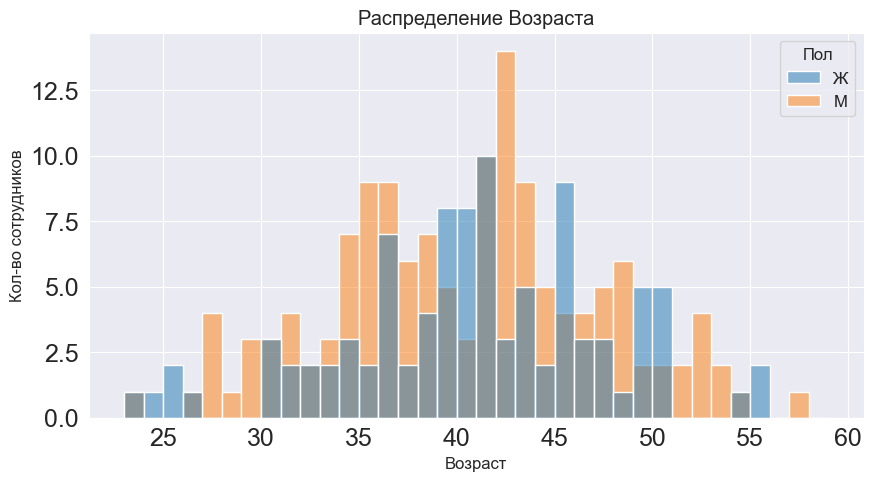

In [13]:
plt.figure(figsize=(10, 5))
sns.histplot(data=data,x='Возраст', hue='Пол', bins=np.arange(data['Возраст'].min(), data['Возраст'].max(), 1))
plt.title('Распределение Возраста')
plt.ylabel('Кол-во сотрудников')
plt.show()

In [14]:
#количество людей в возрасте до
len(data[(data['Возраст']<=30)])

21

In [15]:
#количество людей в возрасте от 30 до 55
len(data[(data['Возраст']>=30) & (data['Возраст']<=55)])

220

**Вывод:**
- **Посмотрели как распределен возраст сотрудников в компании - большая часть сотрудников(220 человек)в возрасте от 30 до 55 лет, среди мужчин больше всего сотрудников в возрасте 41 год, среди женщин сотрудниц в возрасте 40 лет**

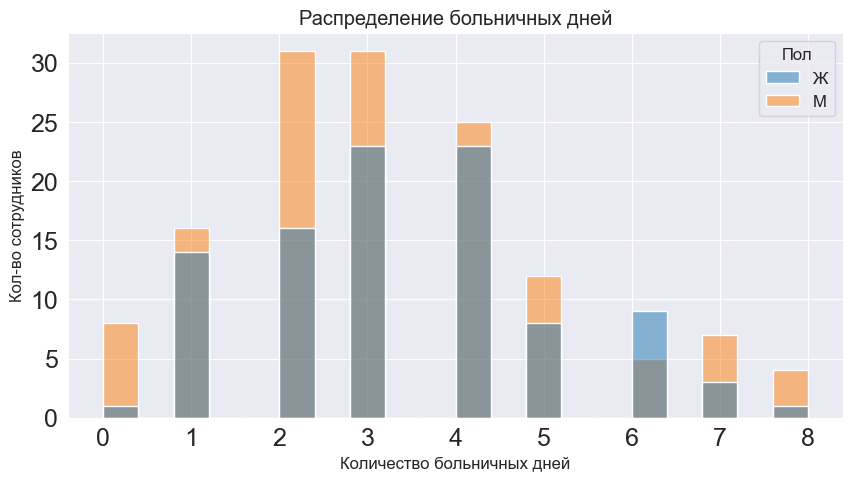

In [16]:
plt.figure(figsize=(10, 5))
sns.histplot(data=data,x='Количество больничных дней', hue='Пол', bins=20)
plt.title('Распределение больничных дней')
plt.ylabel('Кол-во сотрудников')
plt.show()

In [17]:
#статистически посмотрим среднюю продолжительность 
#больничного между мужчинами и женщинами
data.groupby('Пол')['Количество больничных дней'].agg(['mean'])

,mean
Пол,
Ж,3.367347
М,3.179856


**Вывод:**
- **На графике видно, что мужчины чаще берут больничный на 2-3 дня, женщины чаще берут больничный на 3-4 дня**

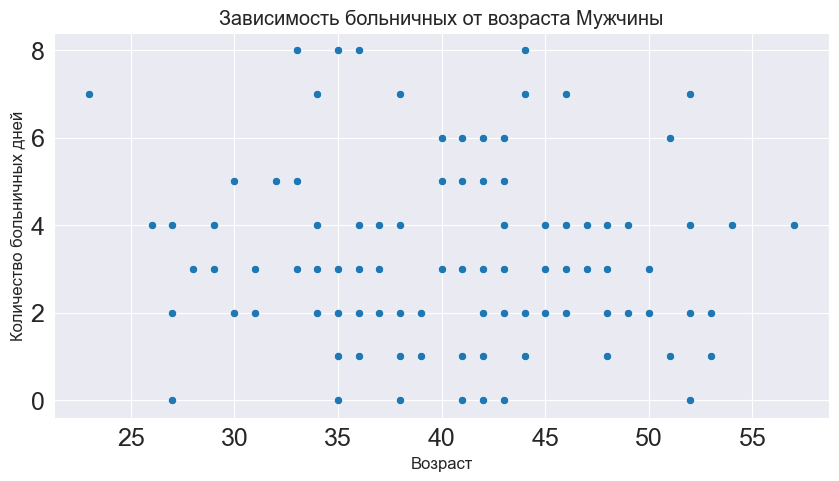

In [18]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Возраст', y='Количество больничных дней', data=data[data['Пол']=='М'])
plt.title('Зависимость больничных от возраста Мужчины')
plt.show()

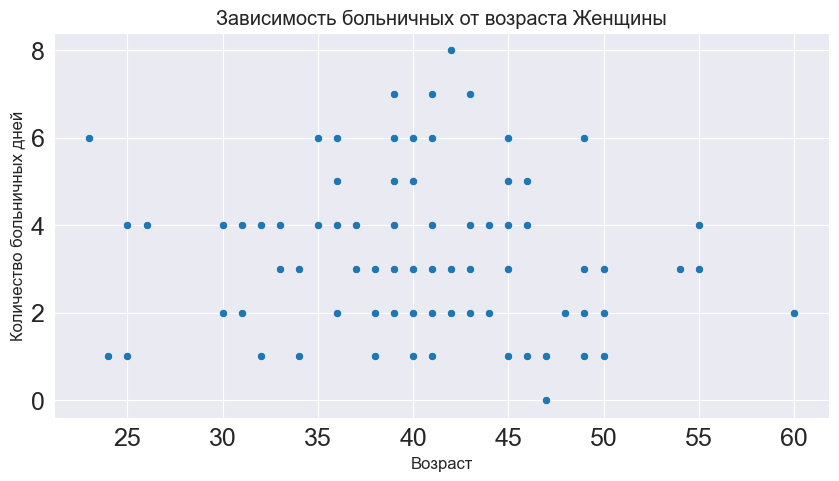

In [19]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Возраст', y='Количество больничных дней', data=data[data['Пол']=='Ж'])
plt.title('Зависимость больничных от возраста Женщины')
plt.show()

**Вывод:**
- **Посмотрели присутствуют ли зависимости между возрастом и количеством больничных дней для мужчин и женщин, определенной зависимости здесь не наблюдается**

# 2. Решение задач
## Задача 1
> **Мужчины пропускают в течение года более 2 рабочих дней (work_days) по болезни значимо чаще женщин.**

In [20]:
#бинарный признак больничный больше 2х дней
data['Больничный>2дней'] = (data['Количество больничных дней']>2)*1
data.head()

,Количество больничных дней,Возраст,Пол,Больничный>2дней
0,5,39,Ж,1
1,4,54,М,1
2,4,26,М,1
3,5,42,М,1
4,4,29,М,1


In [21]:
#процент сотрудников уходящих на бл на более 2дней
data['Больничный>2дней'].agg(['mean'])[0]

0.6371308016877637

In [22]:
#посмотрим статистически для обоих полов
data.groupby('Пол')['Больничный>2дней'].agg(['mean', 'count'])

,mean,count
Пол,,
Ж,0.683673,98
М,0.604317,139


- $H_{0} - $ **Статистически значимой разницы между группами нет**

- $H_{1} - $ **Статистически значимая разница между группами есть**
- $\alpha - $ **0.05**

In [23]:
#разделим на группы
a = data[data['Пол']=='М']['Больничный>2дней']
b = data[data['Пол']=='Ж']['Больничный>2дней']

In [24]:
#ttest для независимых выборок
ttest_ind(a, b, equal_var=False)

Ttest_indResult(statistic=-1.2607036468555317, pvalue=0.20878168641436354)

**pvalue значительно больше уровня значимости, не отвергаем $H_{0}$**

**Вывод:**
- **Если данные это не все сотрудники компании, а лишь часть, то оснований отвергать нулевую гипотезу(Мужчины статистически чаще уходят на больничный более 2 дней) у нас нет**
- **Если данные это все сотрудники компании, то женщины уходят на больничный более двух дней в 68% случаях, в то время как мужчины лишь в 60% случаях**
---

## Задача 2
> **Работники старше 35 лет (age) пропускают в течение года более 2 рабочих дней (work_days) по болезни значимо чаще своих более молодых коллег.**

- $H_{0} - $ **Статистически значимой разницы между группами нет**

- $H_{1} - $ **Статистически значимая разница между группами есть**
- $\alpha - $ **0.05**

In [25]:
#разделим на группы по возрасту
a = data[data['Возраст'] > 35]['Больничный>2дней']
b = data[data['Возраст'] < 35]['Больничный>2дней']

In [26]:
#ttest для независимых выборок
ttest_ind(a, b, equal_var=False)

Ttest_indResult(statistic=-0.4458038364790765, pvalue=0.657102134409535)

**pvalue значительно больше уровня значимости, не отвергаем $H_{0}$**

In [27]:
#бинарный признак возраст более 35
data['Возраст>35'] = (data['Возраст'] > 35)*1

In [28]:
#статистически
data.groupby('Возраст>35')['Больничный>2дней'].agg(['mean', 'count'])

,mean,count
Возраст>35,,
0,0.631579,57
1,0.638889,180


**Вывод:**
- **Если данные это не все сотрудники компании, а лишь часть, то оснований отвергать нулевую гипотезу(Сотрудники старше 35 лет уходят на больничный чаще) у нас нет**
- **Если данные это все сотрудники компании, то в этом случае данные потверждают о том что различий между сотрудниками старше 35 и младше 35 нет**
---

# Итоговый вывод
- **Познакомились с данными всего 237 строк и 3 признака(Дней на больничном, Возраст, Пол), пропусков в данных нет, поправили кодировку, в дальнейшем при работе с данными предлагаю использовать латиницу**
- **Возраст сотрудников в компании от 23 до 60 лет**
- **В среднем у сотрудника больничный длится 3 дня, самый длительное отсутствие сотрудников по болезни составляет 8 дней**
- **Мужчин в компании(139 сотрудников) больше чем женщин(98 сотрудниц)**
- **Мужчины чаще берут больничный на 2-3 дня, женщины чаще берут больничный на 3-4 дня**
---


**Задача 1**
> - **Если данные это не все сотрудники компании, а лишь часть, то оснований отвергать нулевую гипотезу(Мужчины статистически чаще уходят на больничный более 2 дней) у нас нет**
>- **Если данные это все сотрудники компании, то женщины уходят на больничный более двух дней в 68% случаях, в то время как мужчины лишь в 60% случаях**
---

**Задача 2**
>- **Если данные это не все сотрудники компании, а лишь часть, то оснований отвергать нулевую гипотезу(Сотрудники старше 35 лет уходят на больничный чаще) у нас нет**
>- **Если данные это все сотрудники компании, то в этом случае данные тоже потверждают о том что различий между сотрудниками старше 35 и младше 35 нет**